In [2]:
%pylab notebook
import os, sys, pandas as pd, numpy as np
sys.path.append('/Users/alexisdevitre/Documents/code/hts-irradiation')
import hts_fitting as hts
import default_figure_style

outputDirectory = '../figures/raw/'
parentDirectory = '../data/Ic/f23/'

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [5]:
600*1e4*np.pi*(3.125e-3/2)**2

46.01942363656924

<IPython.core.display.Javascript object>


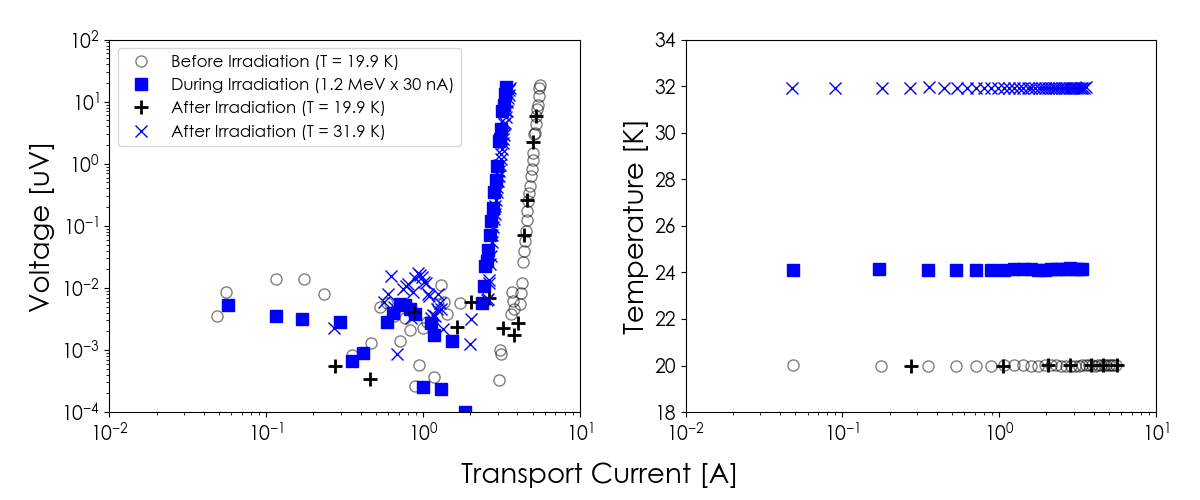

/Users/alexisdevitre/Documents/code/hts-irradiation/hts_fitting.py:58: RuntimeWarning: invalid value encountered in log
  current, voltage = np.log(current), np.log(voltage)
/Users/alexisdevitre/Documents/code/hts-irradiation/hts_fitting.py:58: RuntimeWarning: invalid value encountered in log
  current, voltage = np.log(current), np.log(voltage)
/Users/alexisdevitre/Documents/code/hts-irradiation/hts_fitting.py:58: RuntimeWarning: invalid value encountered in log
  current, voltage = np.log(current), np.log(voltage)
/Users/alexisdevitre/Documents/code/hts-irradiation/hts_fitting.py:58: RuntimeWarning: invalid value encountered in log
  current, voltage = np.log(current), np.log(voltage)


In [10]:

files = [
    'Ic_2023-10-31_23-06-11441040_f23-BeamOn3-20K-a.txt',
    'Ic_2023-10-31_23-12-11310373_f23-BeamOn3-20K-b.txt',
    'Ic_2023-11-01_10-29-29487750_f23-afterIrradiation-20K.txt',
    'Ic_2023-10-31_23-28-08056169_f23-afterIrradiation-32K.txt'
]

params = [
    {'label': 'Before Irradiation (T = 19.9 K)',      'mfc': 'None', 'mec': 'k', 'marker': 'o', 'markersize': 8,  'alpha': .5, 'markeredgewidth': 1},
    {'label': 'During Irradiation (1.2 MeV x 30 nA)', 'mfc': 'b',    'mec': 'b', 'marker': 's', 'markersize': 8,  'alpha': 1,  'markeredgewidth': 1},
    {'label': 'After Irradiation (T = 19.9 K)',       'mfc': 'k',    'mec': 'k', 'marker': '+', 'markersize': 10, 'alpha': 1,  'markeredgewidth': 2},
    {'label': 'After Irradiation (T = 31.9 K)',       'mfc': 'None', 'mec': 'b', 'marker': 'x', 'markersize': 8,  'alpha': 1,  'markeredgewidth': 1}
]

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 5))

for f, p in zip(files, params):
    
    data = pd.read_csv(parentDirectory+f, skiprows=1, delim_whitespace=True)
    ic, n, current, voltage, chisq, pcov = hts.fitIcMeasurement(parentDirectory+f, function='powerLaw')    
    ax[0].loglog(current, voltage*1e6, linestyle='None', **p)
    ax[1].semilogx(data.iHTS_A[::3], data.tHTS_K[::3], linestyle='None', **p)

ax[0].legend(loc='upper left')#, bbox_to_anchor=(1.05, 1.02))
ax[0].set_xlim(1e-2, 1e1)
ax[0].set_ylim(1e-4, 1e2)
ax[1].set_ylim(18, 34)
ax[1].set_yticks([18, 20, 22, 24, 26, 28, 30, 32, 34])
ax[0].set_ylabel('Voltage [uV]')
ax[1].set_ylabel('Temperature [K]') 
fig.text(0.5, 0.05, 'Transport Current [A]', ha='center', va='center', fontweight='bold')

plt.tight_layout(rect=[0, 0.05, 1, 1])


ax[0].set_rasterized(True)
ax[1].set_rasterized(True)
plt.savefig(outputDirectory+'figure01.svg')